<a href="https://colab.research.google.com/github/divyaparadkar/DeepLearning_Traning/blob/main/CNN_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import seaborn as sns
import math
import cv2
from sklearn.metrics import classification_report




In [2]:
data=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
type(data[1][1])

numpy.ndarray

In [4]:
(X_train, y_train),(X_test, y_test)=data

In [5]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [8]:
y_train.shape, y_test.shape

((50000,), (10000,))

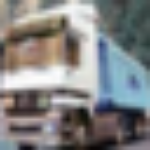

In [9]:
cv2_imshow(cv2.resize(X_train[1],(150,150)))

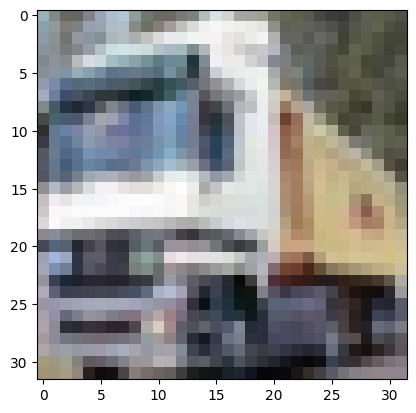

In [10]:
plt.imshow(X_train[1])

In [11]:

def display_image(X,y,index):
  plt.figure(figsize=(3,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [12]:


import matplotlib.pyplot as plt
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#def display_image(X,y,index):
 # plt.figure(figsize=(3,3))
  #plt.imshow(X[index])
  #plt.xlabel(classes[y[index]])


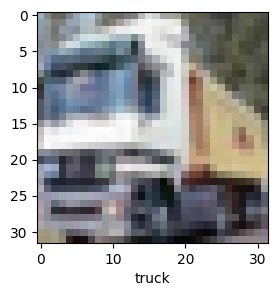

In [13]:
display_image(X_train,y_train,1)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
#X_train[0]

In [16]:
ann_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(10,input_shape=(28*28,),activation="relu"),
    keras.layers.Dense(10,input_shape=(30*30,),activation="sigmoid"),
    keras.layers.Dense(10,input_shape=(30*30,),activation="softmax")
     ])
ann_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
ann_model.fit(X_train,y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 2.1100 - accuracy: 0.2045
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9718 - accuracy: 0.2607
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9395 - accuracy: 0.2641
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9269 - accuracy: 0.2660
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9191 - accuracy: 0.2675
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9151 - accuracy: 0.2694
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9103 - accuracy: 0.2698
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9073 - accuracy: 0.2727
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9046 - accuracy: 0.2761
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1

In [17]:
ann_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(100,activation="sigmoid"),
    keras.layers.Dense(10,activation="softmax")
     ])
ann_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
ann_model.fit(X_test,y_test, epochs=10)


Epoch 1/10
313/313 [==============================] - 23s 69ms/step - loss: 2.2535 - accuracy: 0.1477
Epoch 2/10
313/313 [==============================] - 25s 79ms/step - loss: 2.0921 - accuracy: 0.2065
Epoch 3/10
313/313 [==============================] - 18s 57ms/step - loss: 1.9680 - accuracy: 0.2781
Epoch 4/10
313/313 [==============================] - 15s 47ms/step - loss: 1.8597 - accuracy: 0.3285
Epoch 5/10
313/313 [==============================] - 23s 73ms/step - loss: 1.7848 - accuracy: 0.3611
Epoch 6/10
313/313 [==============================] - 21s 66ms/step - loss: 1.7177 - accuracy: 0.3826
Epoch 7/10
313/313 [==============================] - 19s 61ms/step - loss: 1.6636 - accuracy: 0.4022
Epoch 8/10
313/313 [==============================] - 15s 47ms/step - loss: 1.6018 - accuracy: 0.4280
Epoch 9/10
313/313 [==============================] - 16s 50ms/step - loss: 1.5612 - accuracy: 0.4428
Epoch 10/10
313/313 [==============================] - 15s 47ms/step - loss: 1.535

In [18]:


import numpy as np
from sklearn.metrics import classification_report

y_pred=ann_model.predict(X_test)
print(y_pred.shape)
y_pred_classes=[np.argmax(i) for i in y_pred]
print(y_pred_classes[0])
print(classification_report(y_test,y_pred_classes))


313/313 [==============================] - 3s 9ms/step
(10000, 10)
3
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      1000
           1       0.63      0.52      0.57      1000
           2       0.35      0.29      0.32      1000
           3       0.37      0.31      0.34      1000
           4       0.45      0.37      0.41      1000
           5       0.48      0.32      0.39      1000
           6       0.36      0.73      0.48      1000
           7       0.52      0.50      0.51      1000
           8       0.61      0.56      0.58      1000
           9       0.55      0.56      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [19]:

#

In [20]:
# prompt: correct the error  cnn_model=keras.Sequential([     keras.layers.Conv2D(filters=32,kernel_size(3,3),activation="relu",input_shape=(32,32,3)),     keras.layer.MaxPooling2D((2,2)),          keras.layers.Conv2D(filters=32,kernel_size(3,3),activation="relu",input_shape=(32,32,3)),     keras.layer.MaxPooling2D((2,2)),      keras.layers.Flatten(input_shape=(32,32,3)),     keras.layers.Dense(1000,activat

cnn_model=keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3),strides=(2,2)),
    keras.layers.MaxPooling2D((2,2)),

    #Ann
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
     ])
cnn_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
cnn_model.fit(X_test,y_test, epochs=10)


Epoch 1/10
313/313 [==============================] - 10s 29ms/step - loss: 1.8716 - accuracy: 0.3124
Epoch 2/10
313/313 [==============================] - 10s 31ms/step - loss: 1.4970 - accuracy: 0.4607
Epoch 3/10
313/313 [==============================] - 10s 33ms/step - loss: 1.3515 - accuracy: 0.5216
Epoch 4/10
313/313 [==============================] - 10s 31ms/step - loss: 1.2534 - accuracy: 0.5537
Epoch 5/10
313/313 [==============================] - 9s 28ms/step - loss: 1.1753 - accuracy: 0.5843
Epoch 6/10
313/313 [==============================] - 10s 31ms/step - loss: 1.0796 - accuracy: 0.6164
Epoch 7/10
313/313 [==============================] - 10s 31ms/step - loss: 1.0107 - accuracy: 0.6394
Epoch 8/10
313/313 [==============================] - 10s 31ms/step - loss: 0.9249 - accuracy: 0.6701
Epoch 9/10
313/313 [==============================] - 15s 50ms/step - loss: 0.8707 - accuracy: 0.6953
Epoch 10/10
313/313 [==============================] - 19s 60ms/step - loss: 0.8204

In [24]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              